In [1]:
# ================================================
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„Å®Ë°®Á§∫Ë®≠ÂÆö
# ================================================

# Êï∞ÂÄ§Ë®àÁÆó„Å´‰Ωø„ÅÜ„É©„Ç§„Éñ„É©„É™
import numpy as np
import pandas as pd

# „Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã„É©„Ç§„Éñ„É©„É™
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set()  # Seaborn„ÅÆ„Éá„Éï„Ç©„É´„Éà„Çπ„Çø„Ç§„É´„ÇíÊúâÂäπÂåñÔºàË¶ã„ÇÑ„Åô„ÅÑ„Ç∞„É©„Éï„Å´Ôºâ

# „Éá„Éº„ÇøË™≠„ÅøËæº„Åø
import statsmodels.api as sm

# sktimeÔºö„Ç∞„É©„ÉïÊèèÁîª„É¶„Éº„ÉÜ„Ç£„É™„ÉÜ„Ç£
from sktime.utils.plotting import plot_series

# sktimeÔºö‰∫àÊ∏¨„É¢„Éá„É´
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster

# sktimeÔºö‰∫àÊ∏¨„ÅÆË©ï‰æ°ÊåáÊ®ô
from sktime.performance_metrics.forecasting import (
    mean_absolute_scaled_error,
    MeanAbsoluteError,
    mean_absolute_percentage_error,
    mean_absolute_error,
)

# sktimeÔºö‰∫àÊ∏¨Ë©ï‰æ°„Éª„É¢„Éá„É´ÈÅ∏Êäû
from sktime.forecasting.model_selection import (
    temporal_train_test_split,
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
)
from sktime.forecasting.model_evaluation import evaluate

# sktimeÔºö„Éá„Éº„ÇøÂ§âÊèõÔºàÂ≠£ÁØÄË™øÊï¥„Éª„Éà„É¨„É≥„ÉâÈô§Âéª„ÉªÂ∑ÆÂàÜ„Å™„Å©Ôºâ
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.transformations.series.difference import Differencer
from sktime.transformations.series.boxcox import LogTransformer

# sktimeÔºö„Éë„Ç§„Éó„É©„Ç§„É≥ÊßãÁØâ
from sktime.forecasting.compose import TransformedTargetForecaster, MultiplexForecaster
from sktime.transformations.compose import OptionalPassthrough

# --------------------------------
# „Ç∞„É©„Éï„ÅÆÊó•Êú¨Ë™ûË°®Ë®òË®≠ÂÆö
# --------------------------------
from matplotlib import rcParams

rcParams["font.family"] = "IPAexGothic"
rcParams["font.sans-serif"] = "Meiryo"  # Êó•Êú¨Ë™û„Çí„Äå„É°„Ç§„É™„Ç™„Äç„ÅßË°®Á§∫

# --------------------------------
# DataFrame „ÅÆÂÖ®ËßíÊñáÂ≠óÔºàÊó•Êú¨Ë™û„Å™„Å©Ôºâ„ÅÆÂá∫Âäõ„ÇíÊï¥ÂΩ¢
# --------------------------------
pd.set_option("display.unicode.east_asian_width", True)
# „Åì„Çå„Å´„Çà„Çä„ÄÅDataFrame„Çí print „Åó„Åü„Å®„Åç„Å´
# ÂÖ®ËßíÊñáÂ≠ó„Åå„Åç„Çå„ÅÑ„Å´Êï¥Âàó„Åó„Å¶Ë°®Á§∫„Åï„Çå„Çã

In [2]:
# Ë°®Á§∫Ë®≠ÂÆö
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

In [3]:
# È£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
air_passengers = sm.datasets.get_rdataset("AirPassengers").data

# Êó•‰ªò„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆ‰ΩúÊàê(PeriodIndex)
date_index = pd.period_range(start="1949-01", periods=len(air_passengers), freq="M")
air_passengers.index = date_index

# ‰∏çË¶Å„Å™ÊôÇÈñì„É©„Éô„É´„ÅÆÂâäÈô§
air_passengers = air_passengers.drop(air_passengers.columns[0], axis=1)

# ÁµêÊûú„ÅÆÁ¢∫Ë™ç
print(air_passengers.head(3))

         value
1949-01    112
1949-02    118
1949-03    132


<Axes: >

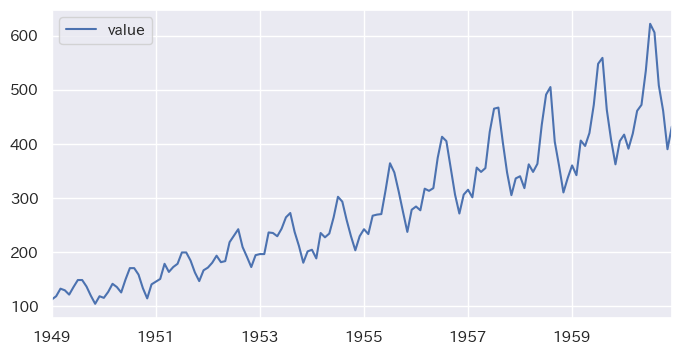

In [4]:
# ÂèÇËÄÉÔºöÁ¥†Êú¥„Å´pandas„ÅÆplotÈñ¢Êï∞„ÇíÈÅ©Áî®

# „Ç∞„É©„Éï„Çµ„Ç§„Ç∫„ÅÆÊåáÂÆö
fig, ax = plt.subplots(figsize=(8, 4))

# Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÇíÊèè„Åè
air_passengers.plot(ax=ax)

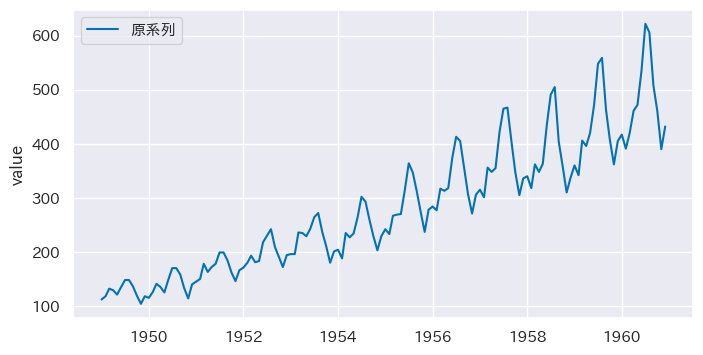

In [5]:
# ÂèÇËÄÉÔºösktime„ÅÆplot_seriesÈñ¢Êï∞„ÇíÂà©Áî®

# ==============================
# È£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„ÇíÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅßÂèØË¶ñÂåñ
# ==============================

# sktime„ÅÆ‰æøÂà©„Å™ÂèØË¶ñÂåñÈñ¢Êï∞plot_series„ÇíÂà©Áî®„Åó„Å¶ÊèèÁîª
# labelsÔºöÂá°‰æã„Å´Ë°®Á§∫„Åô„Çã„É©„Éô„É´
# markersÔºö„Éá„Éº„ÇøÁÇπ„Å´„Éû„Éº„Ç´„Éº„Çí‰ªò„Åë„ÇãÔºà''„ÅßÈùûË°®Á§∫Ôºâ
fig, ax = plot_series(air_passengers, labels=["ÂéüÁ≥ªÂàó"], markers=[""])

# „Ç∞„É©„Éï„Çµ„Ç§„Ç∫„ÅÆÊåáÂÆöÔºàÊ®™8„Ç§„É≥„ÉÅ √ó Á∏¶4„Ç§„É≥„ÉÅÔºâ
fig.set_size_inches(8, 4)

# ax„ÅØmatplotlib„ÅÆAxes„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„Åß„ÄÅ
# „Åï„Çâ„Å´„Çø„Ç§„Éà„É´„ÇÑËª∏„É©„Éô„É´„ÇíËøΩÂä†„Åô„Çã„Åì„Å®„ÇÇÂèØËÉΩ
# ‰æã: ax.set_title('AirPassengers „Éá„Éº„Çø„ÅÆÊôÇÁ≥ªÂàó')

In [6]:
# ===============================================
# Ë®ìÁ∑¥„Éá„Éº„Çø„Å®„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å∏„ÅÆÂàÜÂâ≤
# ===============================================
# temporal_train_test_splitÔºö
#   ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Çí„ÄåÈÅéÂéªÔºàtrainÔºâ„Äç„Å®„ÄåÊú™Êù•ÔºàtestÔºâ„Äç„Å´ÂàÜÂâ≤„Åô„ÇãÈñ¢Êï∞„ÄÇ
#   „É©„É≥„ÉÄ„É†„Åß„ÅØ„Å™„Åè„ÄÅ**ÊôÇÈñìÈ†Ü**„Å´ÂàÜ„Åë„ÇãÁÇπ„ÅåÈáçË¶Å„ÄÇ
#
# test_size=36Ôºö
#   36„ÅãÊúàÔºàÔºù3Âπ¥ÂàÜÔºâ„Çí„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å®„Åó„Å¶Á¢∫‰øù„ÄÇ
#   ÊÆã„Çä„ÅØË®ìÁ∑¥„Éá„Éº„Çø„Å®„Åó„Å¶„É¢„Éá„É´„ÅÆÂ≠¶Áøí„Å´‰ΩøÁî®„Åô„Çã„ÄÇ
#
# test.indexÔºö
#   ÂàÜÂâ≤Âæå„ÅÆ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÔºàÊó•‰ªòÔºâ„ÇíÁ¢∫Ë™ç„ÄÇ
# ===============================================

train, test = temporal_train_test_split(air_passengers, test_size=36)
test.index

PeriodIndex(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]')

In [7]:
# ===============================================
# ‰∫àÊ∏¨ÊúüÈñìÔºàForecasting HorizonÔºâ„ÅÆË®≠ÂÆö
# ===============================================
# fhÔºàForecasting HorizonÔºâ„Å®„ÅØÔºö
#   ‰Ωï„Çπ„ÉÜ„ÉÉ„ÉóÂÖà„Åæ„Åß‰∫àÊ∏¨„Åô„Çã„Åã„ÇíÊåáÂÆö„Åô„Çã„Éô„ÇØ„Éà„É´„ÄÇ
#   sktime„ÅÆ‰∫àÊ∏¨Âô®ÔºàForecasterÔºâ„ÅØ„ÄÅfh„Å´Âü∫„Å•„ÅÑ„Å¶Êú™Êù•„ÅÆÊúüÈñì„ÇíÊ±∫ÂÆö„Åô„Çã„ÄÇ
#
# np.arange(1, len(test) + 1)Ôºö
#   „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÈï∑„Åï„Å®Âêå„Åò„Å†„Åë„Äå1, 2, 3, ...„Äç„Å®„ÅÑ„ÅÜ
#   ‰∫àÊ∏¨„Çπ„ÉÜ„ÉÉ„ÉóÁï™Âè∑„ÇíÁîüÊàê„ÄÇ
#   „Åì„Åì„Åß„ÅØ„ÄÅ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åå36„ÅãÊúàÂàÜ„Å™„ÅÆ„Åß fh = [1, 2, ..., 36]
#   „Å®„Å™„Çä„ÄÅ„Äå36„ÅãÊúàÂÖà„Åæ„Åß‰∫àÊ∏¨„Åô„Çã„Äç„Å®„ÅÑ„ÅÜÊÑèÂë≥„Å´„Å™„Çã„ÄÇ
# ===============================================

fh = np.arange(1, len(test) + 1)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [8]:
# ===============================================
# „Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ÔºàNaive ForecastÔºâ„ÅÆÂÆüË£Ö
# ===============================================
# NaiveForecaster(strategy='last')Ôºö
#   sktime „ÅÆÂçòÁ¥î‰∫àÊ∏¨„É¢„Éá„É´„ÄÇ
#   - strategy='last'ÔºöÁõ¥Ëøë„ÅÆË¶≥Ê∏¨ÂÄ§„Çí„Åù„ÅÆ„Åæ„ÅæÊ¨°„ÅÆ‰∫àÊ∏¨ÂÄ§„Å®„Åô„Çã
#     ÔºàÔºù„ÄåÊåÅÁ∂ö‰∫àÊ∏¨„Äç persistence modelÔºâ„ÄÇ
#
# fit(train)Ôºö
#   Ë®ìÁ∑¥„Éá„Éº„ÇøÔºàtrainÔºâ„Çí‰Ωø„Å£„Å¶„É¢„Éá„É´„ÇíÂΩì„Å¶„ÅØ„ÇÅ„Çã„ÄÇ
#   ‚Äª„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨„Åß„ÅØ„ÄåÊúÄÂæå„ÅÆÂÄ§„Äç„ÇíË®òÈå≤„Åô„Çã„Å†„Åë„ÄÇ
#
# predict(fh)Ôºö
#   fhÔºà‰∫àÊ∏¨ÊúüÈñìÔºâ„ÅßÊåáÂÆö„Åó„ÅüÁØÑÂõ≤Ôºà„Åì„Åì„Åß„ÅØ36„ÅãÊúàÔºâ„Å´„Å§„ÅÑ„Å¶
#   ‰∫àÊ∏¨ÂÄ§„ÇíÁîüÊàê„Åô„Çã„ÄÇ
# ===============================================

naive_forecaster = NaiveForecaster(strategy="last")  # „É¢„Éá„É´ÂÆöÁæ©
naive_forecaster.fit(train)  # Â≠¶Áøí
naive_pred = naive_forecaster.predict(fh)  # ‰∫àÊ∏¨

In [9]:
# ===============================================
# fit_predict() „Å´„Çà„Çã‰∏ÄÊã¨ÂÆüË°å
# ===============================================
# fit_predict():
#   „Éª„É¢„Éá„É´„ÅÆÂ≠¶ÁøíÔºàfitÔºâ„Å®‰∫àÊ∏¨ÔºàpredictÔºâ„Çí1„Çπ„ÉÜ„ÉÉ„Éó„ÅßÂÆüÊñΩ„Åô„ÇãÈñ¢Êï∞„ÄÇ
#   „ÉªÊâãËªΩ„Å´Ë©¶„Åô„Å®„Åç„ÇÑ„Éô„Éº„Çπ„É©„Ç§„É≥Á¢∫Ë™ç„Å´‰æøÂà©„ÄÇ
#
# Âá∫ÂäõÔºö
#   ‰∫àÊ∏¨ÂÄ§„ÅåSeries„Å®„Åó„Å¶Ëøî„Åï„Çå„ÇãÔºà„Åì„Åì„Åß„ÅØÊúÄÂàù„ÅÆ3‰ª∂„ÇíË°®Á§∫Ôºâ„ÄÇ
# ===============================================

print(naive_forecaster.fit_predict(y=train, fh=fh).head(3))

         value
1958-01  336.0
1958-02  336.0
1958-03  336.0


In [10]:
# ===============================================
# Â≠£ÁØÄÊÄß„ÇíËÄÉÊÖÆ„Åó„Åü„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ÔºàÂ≠£ÁØÄ„Éä„Ç§„Éº„ÉñÊ≥ïÔºâ
# ===============================================
# NaiveForecaster(strategy='last', sp=12)
#   „Éªstrategy='last'ÔºöÁõ¥Ââç„ÅÆË¶≥Ê∏¨ÂÄ§„Çí„Åù„ÅÆ„Åæ„ÅæÊ¨°Êúü„ÅÆ‰∫àÊ∏¨ÂÄ§„Å´‰Ωø„ÅÜ„ÄÇ
#   „Éªsp=12ÔºöÂ≠£ÁØÄÂë®ÊúüÔºàseasonal_periodÔºâ„Çí12ÔºàÔºù12„ÅãÊúàÔºâ„Å®ÊåáÂÆö„ÄÇ
#              ‚Üí 1Âπ¥ÂâçÔºàÂêå„ÅòÊúàÔºâ„ÅÆÂÄ§„Çí‰∫àÊ∏¨ÂÄ§„Å®„Åó„Å¶Âà©Áî®„ÄÇ
#
# fit(train)
#   „ÉªË®ìÁ∑¥„Éá„Éº„ÇøÔºàtrainÔºâ„Çí‰Ωø„Å£„Å¶ÂÜÖÈÉ®ÊßãÈÄ†„Çí„Çª„ÉÉ„Éà„ÄÇ
#     ‚Äª„Éä„Ç§„Éº„ÉñÊ≥ï„ÅÆÂ†¥Âêà„ÄÅË§áÈõë„Å™Â≠¶Áøí„ÅØ‰∏çË¶Å„ÄÇ
#
# predict(fh)
#   „ÉªfhÔºà‰∫àÊ∏¨ÊúüÈñìÔºâ„Å´ÂØæ„Åó„Å¶Êú™Êù•„ÅÆÂÄ§„Çí‰∫àÊ∏¨„ÄÇ
# ===============================================

s_naive_forecaster = NaiveForecaster(strategy="last", sp=12)
s_naive_forecaster.fit(train)
s_naive_pred = s_naive_forecaster.predict(fh)

In [11]:
# ===============================================
# Âπ≥ÂùáÂÄ§‰∫àÊ∏¨ÔºàMean ForecastÔºâ
# ===============================================
# NaiveForecaster(strategy='mean')
#   „Éªstrategy='mean'ÔºöË®ìÁ∑¥„Éá„Éº„ÇøÂÖ®‰Ωì„ÅÆÂπ≥ÂùáÂÄ§„Çí
#                        „Åô„Åπ„Å¶„ÅÆÂ∞ÜÊù•ÊôÇÁÇπ„ÅÆ‰∫àÊ∏¨ÂÄ§„Å®„Åó„Å¶‰ΩøÁî®„ÄÇ
#   „Éª„Åì„ÅÆÊñπÊ≥ï„ÅØ„Éà„É¨„É≥„Éâ„ÇÑÂ≠£ÁØÄÊÄß„ÇíÁÑ°Ë¶ñ„Åó„ÄÅ
#     „ÄåÈÅéÂéªÂπ≥Âùá„Åå‰ªäÂæå„ÇÇÁ∂ö„Åè„Äç„Å®‰ªÆÂÆö„Åô„ÇãÂçòÁ¥î„É¢„Éá„É´„ÄÇ
#
# fit(train)
#   „ÉªË®ìÁ∑¥„Éá„Éº„Çø„Åã„ÇâÂπ≥ÂùáÂÄ§„ÇíË®àÁÆó„Åó„Å¶Ë®òÊÜ∂„Åô„Çã„ÄÇ
#
# predict(fh)
#   „ÉªfhÔºà‰∫àÊ∏¨ÊúüÈñìÔºâ„Å´„Çè„Åü„Å£„Å¶„ÄÅ‰∏ÄÂÆö„ÅÆÂπ≥ÂùáÂÄ§„ÇíÂá∫Âäõ„Åô„Çã„ÄÇ
# ===============================================

mean_forecaster = NaiveForecaster(strategy="mean")
mean_forecaster.fit(train)
mean_pred = mean_forecaster.predict(fh)

In [12]:
# ===============================================
# ÁßªÂãïÂπ≥Âùá‰∫àÊ∏¨ÔºàMoving Average ForecastÔºâ
# ===============================================
# NaiveForecaster(strategy='mean', window_length=12)
#   „ÉªÁõ¥Ëøë12ÊúüÈñìÔºà1Âπ¥ÂàÜÔºâ„ÅÆ„Éá„Éº„ÇøÂπ≥Âùá„Çí‰Ωø„Å£„Å¶‰∫àÊ∏¨„Åô„Çã„É¢„Éá„É´„ÄÇ
#   „ÉªÈÅéÂéª1Âπ¥„ÅÆÂπ≥ÂùáÂÄ§„Çí„ÄåÊ¨°„ÅÆÊúüÈñì„ÅÆ‰∫àÊ∏¨ÂÄ§„Äç„Å®„Åø„Å™„Åô„ÄÇ
#   „Éª„Éà„É¨„É≥„Éâ„Çí„Å™„Çâ„Åó„Å¶„ÄÅÂ≠£ÁØÄÁöÑÂ§âÂãï„ÇíÂπ≥ÊªëÂåñ„Åô„ÇãÂäπÊûú„Åå„ÅÇ„Çã„ÄÇ
#
# fit(train)
#   „ÉªË®ìÁ∑¥„Éá„Éº„Çø„ÇíÂü∫„Å´„ÄÅÁõ¥Ëøë12„ÅãÊúàÂàÜ„ÅÆÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó„ÄÇ
#
# predict(fh)
#   „ÉªfhÔºà‰∫àÊ∏¨ÊúüÈñìÔºâ„Å´„Çè„Åü„Å£„Å¶„ÄÅÁõ¥Ëøë12„ÅãÊúàÂπ≥Âùá„ÇíÁπ∞„ÇäËøî„ÅóÂá∫Âäõ„ÄÇ
# ===============================================

ma_forecaster = NaiveForecaster(strategy="mean", window_length=12)
ma_forecaster.fit(train)
ma_pred = ma_forecaster.predict(fh)

In [13]:
# ===============================================
# „Éâ„É™„Éï„Éà‰∫àÊ∏¨ÔºàDrift ForecastÔºâ
# ===============================================
# NaiveForecaster(strategy='drift')
#   „ÉªÊúÄÂàù„Å®ÊúÄÂæå„ÅÆË¶≥Ê∏¨ÂÄ§„ÇíÁµê„Å∂„ÄåÁõ¥Á∑öÔºà„Éà„É¨„É≥„ÉâÔºâ„Äç„ÇíÂª∂Èï∑„Åó„Å¶‰∫àÊ∏¨„Åô„Çã„É¢„Éá„É´„ÄÇ
#   „Éª„Å§„Åæ„Çä„ÄåÈÅéÂéª„ÅÆÂπ≥ÂùáÁöÑ„Å™Â¢óÂä†„ÉªÊ∏õÂ∞ë„ÅÆÂÇæ„ÅçÔºà„Éâ„É™„Éï„ÉàÔºâ„Äç„Åå
#     Â∞ÜÊù•„ÇÇÁ∂ö„Åè„Å®‰ªÆÂÆö„Åó„Å¶‰∫àÊ∏¨„Åô„Çã„ÄÇ
#
# fit(train)
#   „ÉªË®ìÁ∑¥„Éá„Éº„Çø„ÅÆÊúÄÂàù„Å®ÊúÄÂæå„ÅÆÂÄ§„Åã„ÇâÂÇæ„Åç„ÇíÁÆóÂá∫„ÄÇ
#
# predict(fh)
#   „ÉªÁÆóÂá∫„Åó„ÅüÂÇæ„Åç„Å´Âü∫„Å•„Åç„ÄÅÂ∞ÜÊù•ÊôÇÁÇπ„Åæ„ÅßÁõ¥Á∑öÁöÑ„Å´Â§ñÊåø„Åó„Å¶‰∫àÊ∏¨„ÄÇ
# ===============================================

drift_forecaster = NaiveForecaster(strategy="drift")
drift_forecaster.fit(train)
drift_pred = drift_forecaster.predict(fh)

In [14]:
# ===============================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàÊôÇÁ≥ªÂàóÁî®CVÔºâ„ÅÆË®≠ÂÆö
# ===============================================
# ExpandingWindowSplitterÔºö
#   „ÉªÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Å´„Åä„Åë„Çã‰∫§Â∑ÆÊ§úË®ºÔºàCVÔºâ„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆÂàÜÂâ≤„ÇØ„É©„Çπ„ÄÇ
#   „ÉªÈÅéÂéª„ÅÆ„Éá„Éº„Çø„Çí„ÄåÂæê„ÄÖ„Å´Â¢ó„ÇÑ„Åó„Å™„Åå„Çâ„ÄçÂ≠¶Áøí„Åó„ÄÅ
#     1ÊúüÂÖàÔºàfh=1Ôºâ„ÇíÊØéÂõû‰∫àÊ∏¨„Åó„Å¶Á≤æÂ∫¶„ÇíË©ï‰æ°„Åô„Çã„ÄÇ
#
# „Éë„É©„É°„Éº„ÇøÔºö
#   fh=1               ‚Üí 1„Çπ„ÉÜ„ÉÉ„ÉóÂÖà„ÅÆ‰∫àÊ∏¨„ÇíË°å„ÅÜ„ÄÇ
#   initial_window=1   ‚Üí ÊúÄÂàù„ÅÆË®ìÁ∑¥„Éá„Éº„ÇøÁÇπÊï∞„ÅØ1ÔºàÊúÄÂàù„ÅÆ1ÁÇπ„Åã„ÇâÈñãÂßãÔºâ„ÄÇ
#   step_length=1      ‚Üí ÂêÑ„Çπ„ÉÜ„ÉÉ„Éó„Åî„Å®„Å´1ÁÇπ„Åö„Å§Ë®ìÁ∑¥„Éá„Éº„Çø„ÇíÂ¢ó„ÇÑ„Åô„ÄÇ
#
# „Å§„Åæ„ÇäÔºö
#   1ÁÇπ„ÅßÂ≠¶Áøí ‚Üí Ê¨°„ÅÆ1ÁÇπ„Çí‰∫àÊ∏¨ ‚Üí 2ÁÇπ„ÅßÂ≠¶Áøí ‚Üí Ê¨°„ÅÆ1ÁÇπ„Çí‰∫àÊ∏¨ ‚Üí ‚Ä¶ „Å®Áπ∞„ÇäËøî„Åô„ÄÇ
#   ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆ„ÄåÈÄêÊ¨°Â≠¶Áøí„Éª‰∫àÊ∏¨„Äç„ÇíÂÜçÁèæ„Åß„Åç„ÇãË®≠ÂÆö„Åß„ÅÇ„Çã„ÄÇ
# ===============================================

cv = ExpandingWindowSplitter(fh=1, initial_window=1, step_length=1)

In [15]:
# ===============================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàCVÔºâ„ÅÆÂÆüË°å
# ===============================================
# evaluate():
#   „ÉªÊåáÂÆö„Åó„Åü„É¢„Éá„É´„Å®„Éá„Éº„Çø„ÅßÊôÇÁ≥ªÂàóCV„ÇíËá™ÂãïÁöÑ„Å´ÂÆüË°å„Åô„ÇãÈñ¢Êï∞„ÄÇ
#   „ÉªÂêÑ„Çπ„ÉÜ„ÉÉ„Éó„ÅÆ‰∫àÊ∏¨„Å®Ë©ï‰æ°ÊåáÊ®ô„Çí„Åæ„Å®„ÇÅ„Å¶Ëøî„Åô„ÄÇ
#
# ÂºïÊï∞Ôºö
#   forecaster = naive_forecaster   ‚Üí ‰ΩøÁî®„Åô„Çã‰∫àÊ∏¨„É¢„Éá„É´
#   cv         = cv                 ‚Üí ÊôÇÁ≥ªÂàóCV„ÅÆÂàÜÂâ≤„É´„Éº„É´ÔºàExpandingWindowSplitterÔºâ
#   y          = train              ‚Üí Â≠¶Áøí„Å´‰Ωø„ÅÜÊôÇÁ≥ªÂàó„Éá„Éº„Çø
#   scoring    = MeanAbsoluteError()‚Üí Ë©ï‰æ°ÊåáÊ®ôÔºà„Åì„Åì„Åß„ÅØÂπ≥ÂùáÁµ∂ÂØæË™§Â∑Æ MAEÔºâ
#
# Âá∫ÂäõÔºö
#   cv_dfÔºöÂêÑÂàÜÂâ≤„Åî„Å®„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÉªË™§Â∑Æ„Éª„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Å™„Å©„ÇíÂê´„ÇÄDataFrame„ÄÇ
#   „Åì„Åì„Åß„ÅØ„Åù„ÅÆ„ÅÜ„Å°ÊúÄÂàù„ÅÆ3‰ª∂„ÇíË°®Á§∫„Åó„Å¶Á¢∫Ë™ç„Åó„Å¶„ÅÑ„Çã„ÄÇ
# ===============================================

cv_df = evaluate(
    forecaster=naive_forecaster, cv=cv, y=train, scoring=MeanAbsoluteError()
)

print(cv_df.head(3))

   test_MeanAbsoluteError  fit_time  pred_time  len_train_window   cutoff
0                     6.0  0.002892   0.013269                 1  1949-01
1                    14.0  0.001180   0.003390                 2  1949-02
2                     3.0  0.000958   0.002753                 3  1949-03


In [16]:
# ===============================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàCVÔºâÁµêÊûú„ÅÆÈõÜË®à
# ===============================================
# cv_df.iloc[:, 0] „ÅØ„ÄÅÂêÑÂàÜÂâ≤„Çπ„ÉÜ„ÉÉ„Éó„Å´„Åä„Åë„Çã
# 1ÊôÇÁÇπÂÖà‰∫àÊ∏¨„ÅÆ MAEÔºàÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ„ÇíÂèñ„ÇäÂá∫„Åó„Å¶„ÅÑ„Çã„ÄÇ
#
# mean() „Å´„Çà„Å£„Å¶„ÄÅ„Åù„ÅÆÂπ≥ÂùáÂÄ§„ÇíË®àÁÆó„ÄÇ
# ‚Üí „É¢„Éá„É´ÂÖ®‰Ωì„Å®„Åó„Å¶„ÅÆÂπ≥ÂùáÁöÑ„Å™‰∫àÊ∏¨Ë™§Â∑Æ„ÇíÁ¢∫Ë™ç„Åß„Åç„Çã„ÄÇ
# ===============================================

cv_df.iloc[:, 0].mean()

20.317757009345794

In [17]:
# ===============================================
# MASEÔºàMean Absolute Scaled ErrorÔºâ„ÅßÁî®„ÅÑ„ÇãÂü∫Ê∫ñË™§Â∑Æ„ÅÆÁ¢∫Ë™ç
# ===============================================
# „Äånaive_error„Äç„Å®„ÅØÔºö
#   ‚Üí 1ÊúüÂâç„ÅÆÂÄ§ÔºàÊåÅÁ∂ö‰∫àÊ∏¨Ôºâ„Å®„ÅÆÂ∑Æ„ÅÆÁµ∂ÂØæÂÄ§„ÅÆÂπ≥Âùá„ÄÇ
#   ‚Üí MASE „ÅÆÂàÜÊØç„Å®„Åó„Å¶Áî®„ÅÑ„Çâ„Çå„Çã„ÄåÂü∫Ê∫ñË™§Â∑Æ„Äç„ÄÇ
#
# ‰∏ãË®ò„ÅÆÂºè„Åß„ÅØ„ÄÅË®ìÁ∑¥„Éá„Éº„Çø train „ÅÆ‰∏≠„Åß
#   „ÉªÂΩìÊúüÔºà1949-02„Äú1957-12Ôºâ„Å®
#   „Éª1ÊúüÂâçÔºà1949-01„Äú1957-11Ôºâ
# „ÅÆÂÄ§„ÅÆÂ∑Æ„ÇíÂèñ„Çä„ÄÅ„Åù„ÅÆÁµ∂ÂØæÂÄ§„ÅÆÂπ≥Âùá„ÇíÁÆóÂá∫„Åó„Å¶„ÅÑ„Çã„ÄÇ
#
# ÁµêÊûúÁöÑ„Å´„ÄÅ„Åì„Çå„ÅØ„ÄåÊåÅÁ∂ö‰∫àÊ∏¨„ÅÆ1ÊúüÂÖàË™§Â∑Æ„ÅÆÂπ≥Âùá„ÄçÔºùnaive_error „Å´‰∏ÄËá¥„Åô„Çã„ÄÇ
# ===============================================

np.abs(train["1949-02":"1957-12"].values - train["1949-01":"1957-11"].values).mean()

20.317757009345794

In [18]:
# ===============================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàCVÔºâ„ÅÆË®≠ÂÆö„Å®ÂÆüË°åÔºà12„Çπ„ÉÜ„ÉÉ„ÉóÂÖà‰∫àÊ∏¨Ôºâ
# ===============================================
# ExpandingWindowSplitter():
#   „ÉªÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Çí„ÄÅÈÅéÂéª„Åã„ÇâÈ†Ü„Å´„ÄåÊã°Âºµ„Åó„Å™„Åå„Çâ„ÄçË®ìÁ∑¥„ÉªÊ§úË®º„Å´ÂàÜÂâ≤„Åô„ÇãÊñπÊ≥ï„ÄÇ
#
# ÂºïÊï∞Ôºö
#   fh=np.arange(1,13)
#       ‚Üí 1„Äú12„Çπ„ÉÜ„ÉÉ„ÉóÂÖàÔºàÔºù1Âπ¥ÂàÜÔºâ„ÅÆ‰∫àÊ∏¨„ÇíÂØæË±°„Å®„Åô„Çã„ÄÇ
#   initial_window=24
#       ‚Üí ÊúÄÂàù„ÅÆ24ÊôÇÁÇπ„ÇíË®ìÁ∑¥„Éá„Éº„Çø„Å®„Åó„Å¶‰ΩøÁî®Ôºà2Âπ¥ÂàÜÔºâ„ÄÇ
#   step_length=12
#       ‚Üí Ê§úË®º„ÅÆ„Åü„Å≥„Å´12ÊôÇÁÇπÔºà1Âπ¥ÂàÜÔºâ„Åö„Å§Ë®ìÁ∑¥„Éá„Éº„Çø„ÇíÊã°Âºµ„Åô„Çã„ÄÇ
#
# evaluate():
#   „ÉªÊåáÂÆö„Åó„Åü forecasterÔºà„É¢„Éá„É´Ôºâ„Å® CV „É´„Éº„É´„Å´Âæì„ÅÑ„ÄÅ
#     Ë§áÊï∞„Çπ„ÉÜ„ÉÉ„ÉóÂÖà‰∫àÊ∏¨„ÇíËá™Âãï„ÅßÁπ∞„ÇäËøî„ÅóË©ï‰æ°„ÄÇ
#   „Éª„Åì„Åì„Åß„ÅØ MAEÔºàMean Absolute ErrorÔºâ„ÇíÊåáÊ®ô„Å´Êé°Áî®„ÄÇ
#   „Éªreturn_data=True „Å´„Çà„Çä„ÄÅÂêÑ„Çπ„ÉÜ„ÉÉ„Éó„ÅÆ
#     ‰∫àÊ∏¨ÂÄ§„ÉªÂÆüÊ∏¨ÂÄ§„ÇÇÁµêÊûú„Å´Âê´„ÇÅ„Çã„ÄÇ
#
# Âá∫ÂäõÔºö
#   cv_df: ÂêÑÂàÜÂâ≤„Çπ„ÉÜ„ÉÉ„Éó„Å´„Åä„Åë„Çã MAE „Å®ÂØæÂøú„Åô„Çã‰∫àÊ∏¨„ÉªÂÆüÊ∏¨„Éá„Éº„Çø„ÅåÊ†ºÁ¥ç„Åï„Çå„Åü DataFrame„ÄÇ
# ===============================================

cv = ExpandingWindowSplitter(fh=np.arange(1, 13), initial_window=24, step_length=12)

cv_df = evaluate(
    forecaster=naive_forecaster,
    cv=cv,
    y=train,
    scoring=MeanAbsoluteError(),
    return_data=True,
)

In [19]:
# ===============================================
# 12ÊôÇÁÇπÂÖà‰∫àÊ∏¨Ôºà1Âπ¥ÂÖà‰∫àÊ∏¨Ôºâ„ÅÆÂπ≥ÂùáMAE„ÇíÁÆóÂá∫
# ===============================================
# cv_df.iloc[:, 0]:
#   evaluate() „ÅÆÁµêÊûú DataFrameÔºàcv_dfÔºâ„ÅÆÊúÄÂàù„ÅÆÂàó„Å´„ÄÅ
#   ÂêÑCVÂàÜÂâ≤ÔºàfoldÔºâ„ÅßÂæó„Çâ„Çå„Åü MAEÔºàÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ„ÅåÊ†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ
#
# mean():
#   „Åù„Çå„Çâ„ÅÆ MAE „ÇíÂπ≥Âùá„Åô„Çã„Åì„Å®„Åß„ÄÅ
#   „Äå„É¢„Éá„É´ÂÖ®‰Ωì„Å®„Åó„Å¶„ÅÆ12„Çπ„ÉÜ„ÉÉ„ÉóÂÖà‰∫àÊ∏¨Ë™§Â∑Æ„ÅÆÂπ≥ÂùáÂÄ§„Äç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ
#
# ÁµêÊûúÔºö
#   ‚Üí „É¢„Éá„É´Ôºà„Åì„Åì„Åß„ÅØ NaiveForecasterÔºâ„ÅÆÈï∑Êúü‰∫àÊ∏¨Á≤æÂ∫¶„Çí
#      Âçò‰∏ÄÊåáÊ®ô„Å®„Åó„Å¶Ë©ï‰æ°„Åß„Åç„Çã„ÄÇ
# ===============================================

cv_df.iloc[:, 0].mean()

43.511904761904766

In [20]:
# ===============================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàCVÔºâ„ÅÆÁµêÊûú„ÅÆË©≥Á¥∞„ÇíÁ¢∫Ë™ç
# ===============================================
# evaluate() „ÅÆÂá∫ÂäõÔºàcv_dfÔºâ„ÅØ„ÄÅÂêÑÂàÜÂâ≤„Çπ„ÉÜ„ÉÉ„ÉóÔºàfoldÔºâ„Åî„Å®„ÅÆ
# ‰∫àÊ∏¨ÁµêÊûú„Å®Ë©ï‰æ°ÊåáÊ®ôÔºà„Åì„Åì„Åß„ÅØ MAEÔºâ„Çí„Åæ„Å®„ÇÅ„Åü DataFrame„ÄÇ
#
# Âê´„Åæ„Çå„Çã‰∏ª„Å™ÊÉÖÂ†±Ôºö
#   - test_fold      : ÂêÑCVÂàÜÂâ≤„ÅÆÁï™Âè∑
#   - test_start/end : Ê§úË®º„Å´‰Ωø„Çè„Çå„ÅüÊúüÈñìÔºàÊôÇÁ≥ªÂàó„ÅÆÁØÑÂõ≤Ôºâ
#   - MAE            : „Åù„ÅÆÂàÜÂâ≤„Å´„Åä„Åë„ÇãÂπ≥ÂùáÁµ∂ÂØæË™§Â∑Æ
#   - y_pred         : ‰∫àÊ∏¨„Åï„Çå„ÅüÂÄ§Ôºàreturn_data=True „ÅÆÂ†¥ÂêàÔºâ
#   - y_test         : ÂÆüÈöõ„ÅÆÂÄ§ÔºàÂêå‰∏äÔºâ
#
# head(3) „ÅßÊúÄÂàù„ÅÆ3ÂàÜÂâ≤ÂàÜ„ÇíÁ¢∫Ë™ç„Åó„ÄÅ
# CV„ÅåÊ≠£„Åó„ÅèÂÆüË°å„Åï„Çå„Å¶„ÅÑ„Çã„Åã„ÇíÊ§úË®º„Åß„Åç„Çã„ÄÇ
# ===============================================

cv_df.head(3)

test_MeanAbsoluteError  fit_time  pred_time  len_train_window   cutoff  \
0               30.166667  0.002245   0.008659                24  1950-12   
1               31.000000  0.003514   0.007164                36  1951-12   
2               33.333333  0.001350   0.007661                48  1952-12   

                                             y_train  \
0           value
1949-01    112
1949-02    118
1...   
1           value
1949-01    112
1949-02    118
1...   
2           value
1949-01    112
1949-02    118
1...   

                                              y_test  \
0           value
1951-01    145
1951-02    150
1...   
1           value
1952-01    171
1952-02    180
1...   
2           value
1953-01    196
1953-02    196
1...   

                                              y_pred  
0           value
1951-01  140.0
1951-02  140.0
1...  
1           value
1952-01  166.0
1952-02  166.0
1...  
2           value
1953-01  194.0
1953-02  194.0
1...

Text(0, 0.5, '‰πóÂÆ¢Êï∞')

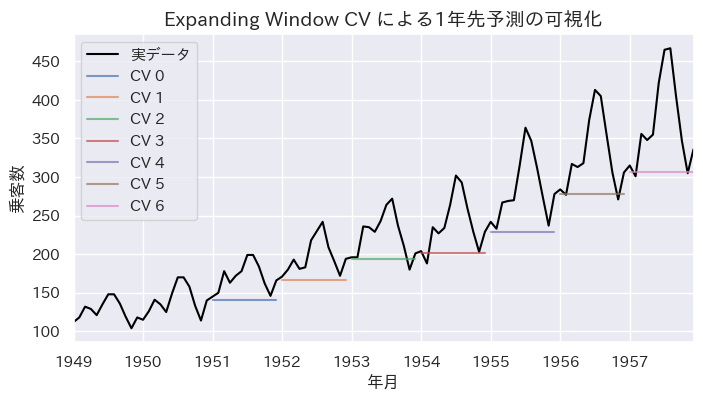

In [21]:
# ===============================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàCVÔºâÂêÑ„Çπ„ÉÜ„ÉÉ„Éó„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÇíÂèØË¶ñÂåñ
# ===============================================

# „Ç∞„É©„Éï„ÅÆÊèèÁîªË®≠ÂÆö
fig, ax = plt.subplots(figsize=(8, 4))  # Âõ≥„ÅÆ„Çµ„Ç§„Ç∫„ÇíÊåáÂÆöÔºà8x4„Ç§„É≥„ÉÅÔºâ

# Ë®ìÁ∑¥„Éá„Éº„ÇøÔºàÂÆüÈöõ„ÅÆË¶≥Ê∏¨ÂÄ§Ôºâ„ÅÆÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÇíÊèè„Åè
train.plot(ax=ax, color="black", label="ÂÆü„Éá„Éº„Çø")

# ÂêÑCVÂàÜÂâ≤ÔºàfoldÔºâ„ÅßÂæó„Çâ„Çå„Åü‰∫àÊ∏¨ÂÄ§„ÇíÈáç„Å≠„Å¶„Éó„É≠„ÉÉ„Éà
for i in np.arange(0, cv_df.shape[0]):
    # evaluate(..., return_data=True) „Å´„Çà„Çä y_pred „Åå‰øùÂ≠ò„Åï„Çå„Å¶„ÅÑ„Çã
    cv_df["y_pred"].iloc[i].plot(ax=ax, alpha=0.7)

# Âá°‰æã„ÇíË®≠ÂÆö
# "actual" ‚Üí ÂÆüÊ∏¨ÂÄ§
# "CV 0", "CV 1", ... ‚Üí ÂêÑÂàÜÂâ≤„ÅÆ‰∫àÊ∏¨ÁµêÊûú
plt.legend(["ÂÆü„Éá„Éº„Çø"] + [f"CV {i}" for i in range(cv_df.shape[0])])

# „Çø„Ç§„Éà„É´„Å®Ëª∏„É©„Éô„É´„ÅÆËøΩÂä†Ôºà‰ªªÊÑèÔºâ
plt.title("Expanding Window CV „Å´„Çà„Çã1Âπ¥ÂÖà‰∫àÊ∏¨„ÅÆÂèØË¶ñÂåñ", fontsize=14)
plt.xlabel("Âπ¥Êúà")
plt.ylabel("‰πóÂÆ¢Êï∞")

# ===============================================
# Ëß£Ë™¨Ôºö
# ÂêÑÊäò„ÇåÁ∑ö„ÅØ„ÄåÁâπÂÆöÊôÇÁÇπ„Åæ„Åß„ÅßÂ≠¶Áøí ‚Üí Ê¨°„ÅÆ12„É∂Êúà„Çí‰∫àÊ∏¨„Äç„Åó„ÅüÁµêÊûú„ÄÇ
# ÂàÜÂâ≤„Åî„Å®„Å´Ë®ìÁ∑¥„Éá„Éº„Çø„ÅåÂ∫É„Åå„Å£„Å¶„ÅÑ„ÅèÊßòÂ≠ê„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Çã„ÄÇ
# ===============================================

In [22]:
# ==========================================================
# ‰∫àÊ∏¨„Éë„Ç§„Éó„É©„Ç§„É≥ÔºàÂ≠£ÁØÄË™øÊï¥ ‚Üí „Éà„É¨„É≥„ÉâÈô§Âéª ‚Üí ‰∫àÊ∏¨Ôºâ„ÇíÊßãÁØâ
# ==========================================================

# TransformedTargetForecaster „ÅØ„ÄÅÂâçÂá¶ÁêÜ„Å®‰∫àÊ∏¨Âô®„ÇíÈÄ£Áµê„Åß„Åç„Çã„ÇØ„É©„Çπ„ÄÇ
# ‰∏ã„Åã„ÇâÈ†Ü„Å´„ÄÅÁõÆÁöÑÂ§âÊï∞ÔºàyÔºâ„Å´ÂØæ„Åó„Å¶‰ª•‰∏ã„ÅÆÂá¶ÁêÜ„ÇíÈ†ÜÁï™„Å´ÈÅ©Áî®„Åô„ÇãÔºö
# ‚ë† Â≠£ÁØÄÊàêÂàÜ„ÅÆÈô§ÂéªÔºàDeseasonalizerÔºâ
# ‚ë° „Éà„É¨„É≥„ÉâÊàêÂàÜ„ÅÆÈô§ÂéªÔºàDetrenderÔºâ
# ‚ë¢ ÊÆãÂ∑Æ„Å´ÂØæ„Åó„Å¶ÂçòÁ¥î„Å™‰∫àÊ∏¨ÔºàNaiveForecasterÔºâ

pipe_forecaster_1 = TransformedTargetForecaster(
    [
        # ------------------------------
        # (1) Â≠£ÁØÄÊàêÂàÜ„ÅÆÈô§Âéª
        # ------------------------------
        # „É¢„Éá„É´: ‰πóÊ≥ïÂûãÔºàmultiplicativeÔºâ
        # Âë®Êúü: 12Ôºà= 12„É∂Êúà„Åî„Å®„Å´Áπ∞„ÇäËøî„ÅôÂ≠£ÁØÄÊÄßÔºâ
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
        # ------------------------------
        # (2) „Éà„É¨„É≥„ÉâÊàêÂàÜ„ÅÆÈô§Âéª
        # ------------------------------
        # 1Ê¨°Â§öÈ†ÖÂºèÔºàÁ∑öÂΩ¢„Éà„É¨„É≥„ÉâÔºâ„Åß„Éï„Ç£„ÉÉ„ÉÜ„Ç£„É≥„Ç∞„Åó„ÄÅÈô§Âéª„Åô„Çã
        (
            "detrend",
            Detrender(
                forecaster=PolynomialTrendForecaster(degree=1), model="multiplicative"
            ),
        ),
        # ------------------------------
        # (3) ÊÆãÂ∑ÆÁ≥ªÂàó„Å´ÂØæ„Åó„Å¶‰∫àÊ∏¨„ÇíË°å„ÅÜ
        # ------------------------------
        # „ÄåÁõ¥Ëøë„ÅÆÂÄ§ÔºàlastÔºâ„Äç„ÇíÊ¨°„ÅÆÊôÇÁÇπ„ÅÆ‰∫àÊ∏¨„Å®„Åô„Çã„Éä„Ç§„Éº„ÉñÊ≥ï
        ("forecast", NaiveForecaster(strategy="last")),
    ]
)

# ==========================================================
# Ëß£Ë™¨Ôºö
# „Éª„Åì„ÅÆ„Çà„ÅÜ„Å´„Éë„Ç§„Éó„É©„Ç§„É≥Âåñ„Åô„Çã„Åì„Å®„Åß„ÄÅ„Éà„É¨„É≥„Éâ„ÉªÂ≠£ÁØÄ„ÅÆÂΩ±Èüø„Çí
#   Ëá™ÂãïÁöÑ„Å´Èô§Âéª„Åó„Åü‰∏ä„Åß‰∫àÊ∏¨„ÇíË°å„ÅÜ„Åì„Å®„Åå„Åß„Åç„Çã„ÄÇ
# „Éªsktime„Åß„ÅØÂâçÂá¶ÁêÜÔºàDeseasonalizer, DetrenderÔºâ„ÇÇ„ÄåÂ§âÊèõÂô®„Äç„Å®„Åó„Å¶
#   Áµ±‰∏ÄÁöÑ„Å´Êâ±„Åà„Çã„Åü„ÇÅ„ÄÅÊüîËªü„Å™„É¢„Éá„É´ÊßãÁØâ„ÅåÂèØËÉΩ„Å®„Å™„Çã„ÄÇ
# ==========================================================

In [23]:
# ==========================================================
# „Éë„Ç§„Éó„É©„Ç§„É≥„É¢„Éá„É´„ÅÆÂ≠¶Áøí„Éª‰∫àÊ∏¨„ÉªË©ï‰æ°
# ==========================================================

# ------------------------------
# (1) „Éá„Éº„Çø„Å∏„ÅÆÂΩì„Å¶„ÅØ„ÇÅÔºàÂ≠¶ÁøíÔºâ
# ------------------------------
# train „Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„ÄÅ‰ª•‰∏ã„ÅÆÈ†Ü„Å´Âá¶ÁêÜ„ÇíÈÅ©Áî®Ôºö
#   ‚ë† Â≠£ÁØÄÊàêÂàÜ„ÅÆÈô§ÂéªÔºàDeseasonalizerÔºâ
#   ‚ë° „Éà„É¨„É≥„ÉâÊàêÂàÜ„ÅÆÈô§ÂéªÔºàDetrenderÔºâ
#   ‚ë¢ ÊÆãÂ∑ÆÁ≥ªÂàó„Å´ÂØæ„Åó„Å¶„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ÔºàNaiveForecasterÔºâ
pipe_forecaster_1.fit(train)

# ------------------------------
# (2) ‰∫àÊ∏¨„ÅÆÂÆüÊñΩ
# ------------------------------
# fh „ÅØ "forecasting horizon"Ôºà‰∫àÊ∏¨„ÅÆÂÖà„ÅÆÊúüÈñìÔºâ„ÇíË°®„Åô„ÄÇ
# „Åì„Åì„Åß„ÅØ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÊúüÈñìÂàÜÔºà36„ÅãÊúàÔºâ„Çí‰∫àÊ∏¨„ÄÇ
pipe_pred_1 = pipe_forecaster_1.predict(fh)

# ------------------------------
# (3) ‰∫àÊ∏¨Á≤æÂ∫¶„ÅÆÁÆóÂá∫ÔºàMAEÔºâ
# ------------------------------
# Âπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºàMean Absolute ErrorÔºâ„ÇíÁî®„ÅÑ„Å¶Ë©ï‰æ°„ÄÇ
# ÂÄ§„ÅåÂ∞è„Åï„ÅÑ„Åª„Å©„ÄÅ‰∫àÊ∏¨Á≤æÂ∫¶„ÅåÈ´ò„ÅÑ„Åì„Å®„ÇíÊÑèÂë≥„Åô„Çã„ÄÇ
mae_value = mean_absolute_error(test, pipe_pred_1)

print("Âπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºàMAEÔºâ:", round(mae_value, 3))

# ==========================================================
# Ëß£Ë™¨Ôºö
# „Éªsktime„ÅÆ„Éë„Ç§„Éó„É©„Ç§„É≥„Çí‰Ωø„ÅÜ„Åì„Å®„Åß„ÄÅÂ≠£ÁØÄË™øÊï¥„ÇÑ„Éà„É¨„É≥„ÉâÈô§Âéª„Çí
#   ÊòéÁ§∫ÁöÑ„Å´Ë°å„Çè„Åö„Å´„ÄÅÁµ±‰∏ÄÁöÑ„Å´Â≠¶Áøí„Éª‰∫àÊ∏¨„ÉªË©ï‰æ°„ÇíË°å„Åà„Çã„ÄÇ
# „Éª„Åì„ÅÆÊâãÊ≥ï„ÅØ„ÄÅÂ≠£ÁØÄÊÄß„Éª„Éà„É¨„É≥„Éâ„ÇíÊåÅ„Å§„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶
#   „ÄåÂçòÁ¥î„Å™„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨„Äç„Çà„Çä„ÇÇÈ´òÁ≤æÂ∫¶„Å´„Å™„Çã„Åì„Å®„ÅåÂ§ö„ÅÑ„ÄÇ
# ==========================================================

Âπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºàMAEÔºâ: 23.601


In [24]:
# ==========================================================
# ÊôÇÁ≥ªÂàó„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÔºàCVÔºâ„Å´„Çà„ÇãÊÄßËÉΩË©ï‰æ°
# ==========================================================

# ------------------------------
# (1) „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Ë®≠ÂÆö
# ------------------------------
# ExpandingWindowSplitterÔºö
#   „ÉªÂàùÊúü„ÅÆË®ìÁ∑¥„Éá„Éº„ÇøÊï∞Ôºö24ÔºàÔºù2Âπ¥ÂàÜÔºâ
#   „Éª‰∫àÊ∏¨„Çπ„ÉÜ„ÉÉ„ÉóÊï∞Ôºö12ÔºàÔºù1Âπ¥ÂÖà„Åæ„Åß‰∫àÊ∏¨Ôºâ
#   „Éªstep_length=12 ‚Üí ÊØéÂõû1Âπ¥ÂàÜ„Åö„Å§Ë®ìÁ∑¥„Éá„Éº„Çø„ÇíÊã°Âºµ„Åó„Å¶ÂÜçÂ≠¶Áøí
#
# ‰æãÔºö
#   1ÂõûÁõÆ ‚Üí 1949-1950 „ÅßÂ≠¶Áøí„Åó„ÄÅ1951Âπ¥„Çí‰∫àÊ∏¨
#   2ÂõûÁõÆ ‚Üí 1949-1951 „ÅßÂ≠¶Áøí„Åó„ÄÅ1952Âπ¥„Çí‰∫àÊ∏¨
#   ...
cv = ExpandingWindowSplitter(
    fh=np.arange(1, 13),  # ‰∫àÊ∏¨ÊúüÈñìÔºö12„ÅãÊúàÂÖà
    initial_window=24,  # ÂàùÊúü„Ç¶„Ç£„É≥„Éâ„Ç¶Ôºö24„ÅãÊúà
    step_length=12,  # „Çπ„ÉÜ„ÉÉ„ÉóÈï∑Ôºö12„ÅãÊúà
)

# ------------------------------
# (2) „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅÆÂÆüË°å
# ------------------------------
# evaluate():
#   „ÉªÊåáÂÆö„Åó„Åü forecasterÔºà„Éë„Ç§„Éó„É©„Ç§„É≥Ôºâ„Çí‰Ωø„Å£„Å¶
#     ÂêÑÂàÜÂâ≤„Åî„Å®„Å´‰∫àÊ∏¨„ÇíÂÆüÊñΩ
#   „ÉªMAEÔºàÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ„ÅßÊÄßËÉΩ„ÇíË©ï‰æ°
cv_df = evaluate(
    forecaster=pipe_forecaster_1, cv=cv, y=train, scoring=MeanAbsoluteError()
)

# ------------------------------
# (3) Ë©ï‰æ°ÊåáÊ®ô„ÅÆÂπ≥ÂùáÂÄ§ÔºàMAEÔºâ„ÇíÁÆóÂá∫
# ------------------------------
mean_mae = cv_df.iloc[:, 0].mean()
print("12„ÅãÊúàÂÖà‰∫àÊ∏¨„ÅÆÂπ≥ÂùáMAEÔºö", round(mean_mae, 3))

# ==========================================================
# Ëß£Ë™¨Ôºö
# „ÉªExpandingWindowSplitter „Å´„Çà„Çä„ÄÅ
#   „ÄåÊôÇÈñì„ÅÆÊµÅ„Çå„Çí‰øù„Å£„ÅüÊ§úË®º„Äç„ÅåÂèØËÉΩÔºàÊú™Êù•ÊÉÖÂ†±„ÅÆ„É™„Éº„ÇØ„ÇíÈò≤„ÅêÔºâ„ÄÇ
# „Éª„Åì„ÅÆÊñπÊ≥ï„ÅØÊôÇÁ≥ªÂàó„É¢„Éá„É´„ÅÆÊ±éÂåñÊÄßËÉΩË©ï‰æ°„Å´„Åä„ÅÑ„Å¶
#   ÊúÄ„ÇÇ‰ø°È†ºÊÄß„ÅÆÈ´ò„ÅÑÊ§úË®ºÊâãÊ≥ï„ÅÆ‰∏Ä„Å§„Åß„ÅÇ„Çã„ÄÇ
# ==========================================================

12„ÅãÊúàÂÖà‰∫àÊ∏¨„ÅÆÂπ≥ÂùáMAEÔºö 11.811


In [25]:
# ==========================================================
# Â∑ÆÂàÜ„ÇíÁî®„ÅÑ„Åü„Éë„Ç§„Éó„É©„Ç§„É≥‰∫àÊ∏¨ÔºàÂ≠£ÁØÄÊÄßÂØæÂøú„Éä„Ç§„Éº„ÉñÊ≥ïÔºâ
# ==========================================================

# ------------------------------
# (1) „É¢„Éá„É´ÊßãÊàê„ÅÆÊåáÂÆö
# ------------------------------
# TransformedTargetForecasterÔºö
#   „ÉªÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ„Åã„Çâ‰∫àÊ∏¨„Åæ„Åß„Çí‰∏ÄÊã¨„ÅßÁÆ°ÁêÜ„Åß„Åç„Çã„ÇØ„É©„Çπ„ÄÇ
#
# „Åì„ÅÆ„Éë„Ç§„Éó„É©„Ç§„É≥„Åß„ÅØÊ¨°„ÅÆÂá¶ÁêÜ„ÇíÈ†ÜÁï™„Å´ÂÆüË°å„Åô„ÇãÔºö
#   ‚ë† 1ÈöéÂ∑ÆÂàÜÔºàDifferencerÔºâ„ÇíÈÅ©Áî®„Åó„Å¶„Éà„É¨„É≥„Éâ„ÇíÈô§Âéª
#      ‚Üí „Éá„Éº„Çø„ÅÆÈùûÂÆöÂ∏∏ÊÄß„ÇíËªΩÊ∏õÔºà„Éâ„É™„Éï„Éà„ÇíÂèñ„ÇäÈô§„ÅèÔºâ
#   ‚ë° Â≠£ÁØÄÊÄß„ÇíËÄÉÊÖÆ„Åó„Åü„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨Ôºàsp=12Ôºâ
#      ‚Üí 1Âπ¥Ââç„ÅÆÂÄ§„Çí„Åù„ÅÆ„Åæ„ÅæÊ¨°Âπ¥„ÅÆ‰∫àÊ∏¨ÂÄ§„Å®„Åó„Å¶‰ΩøÁî®
#
pipe_forecaster_2 = TransformedTargetForecaster(
    [
        ("transform", Differencer(lags=[1])),  # Â∑ÆÂàÜÂ§âÊèõÔºà„Éà„É¨„É≥„ÉâÈô§ÂéªÔºâ
        ("forecast", NaiveForecaster(strategy="last", sp=12)),  # Â≠£ÁØÄ„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨
    ]
)

# ------------------------------
# (2) Â≠¶ÁøíÔºàfitÔºâ
# ------------------------------
pipe_forecaster_2.fit(train)

# ------------------------------
# (3) ‰∫àÊ∏¨ÔºàpredictÔºâ
# ------------------------------
pipe_pred_2 = pipe_forecaster_2.predict(fh)

# ------------------------------
# (4) ‰∫àÊ∏¨Á≤æÂ∫¶Ë©ï‰æ°ÔºàMAEÔºâ
# ------------------------------
mae_result = mean_absolute_error(test, pipe_pred_2)
print("Â∑ÆÂàÜ + Â≠£ÁØÄ„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ „ÅÆ MAEÔºö", round(mae_result, 3))

# ==========================================================
# Ëß£Ë™¨Ôºö
# „ÉªDifferencer „Å´„Çà„Çä„ÄåÈùûÂÆöÂ∏∏ÊÄßÔºà„Éà„É¨„É≥„ÉâÊàêÂàÜÔºâ„Äç„ÇíÈô§Âéª„Åô„Çã„Åì„Å®„Åß„ÄÅ
#   „É¢„Éá„É´„ÅåÂë®ÊúüÊÄßÔºàÂ≠£ÁØÄÂ§âÂãïÔºâ„ÅÆ„Åø„Å´ÈõÜ‰∏≠„Åó„Å¶‰∫àÊ∏¨„Åß„Åç„Çã„ÄÇ
# „Éªsp=12 „Å´„Çà„Çä„ÄÅÊúàÊ¨°„Éá„Éº„Çø„Åß1Âπ¥Âë®Êúü„ÅÆÂ≠£ÁØÄÊÄß„ÇíÊòéÁ§∫ÁöÑ„Å´ËÄÉÊÖÆ„ÄÇ
# „Éª„Åì„ÅÆÊßãÊàê„ÅØ„ÄåÂçòÁ¥î„Å†„ÅåÂ†ÖÁâ¢„Äç„Å™„Éô„Éº„Çπ„É©„Ç§„É≥„É¢„Éá„É´„Å®„Åó„Å¶ÊúâÁî®„ÄÇ
# ==========================================================

Â∑ÆÂàÜ + Â≠£ÁØÄ„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ „ÅÆ MAEÔºö 17.806


In [26]:
# ==========================================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Å´„Çà„Çã‰∫àÊ∏¨ÊÄßËÉΩ„ÅÆÊ§úË®ºÔºàMAEÂπ≥ÂùáÔºâ
# ==========================================================

# ExpandingWindowSplitter(cv) „ÇíÁî®„ÅÑ„Å¶ÊôÇÁ≥ªÂàóCV„ÇíÂÆüË°å„ÄÇ
# ÂêÑ„Çπ„ÉÜ„ÉÉ„Éó„Åß„Äå12ÊôÇÁÇπÂÖà‰∫àÊ∏¨„Äç„ÇíË°å„ÅÑ„ÄÅ
# Â∑ÆÂàÜ + Â≠£ÁØÄ„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨„É¢„Éá„É´Ôºàpipe_forecaster_2Ôºâ„ÅÆÊ±éÂåñÊÄßËÉΩ„ÇíË©ï‰æ°„ÄÇ

mean_cv_mae = (
    evaluate(
        forecaster=pipe_forecaster_2,  # „É¢„Éá„É´Ôºà„Éë„Ç§„Éó„É©„Ç§„É≥Ôºâ
        cv=cv,  # „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Ë®≠ÂÆöÔºà12„Çπ„ÉÜ„ÉÉ„Éó„Åö„Å§Êã°ÂºµÔºâ
        y=train,  # Ë®ìÁ∑¥„Éá„Éº„Çø
        scoring=MeanAbsoluteError(),  # Ë©ï‰æ°ÊåáÊ®ôÔºàÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ
    )
    .iloc[:, 0]
    .mean()  # ÂêÑfold„ÅÆMAE„ÅÆÂπ≥Âùá„ÇíÁÆóÂá∫
)

print("CV„Å´„Çà„ÇãÂπ≥ÂùáMAEÔºö", round(mean_cv_mae, 3))

# ----------------------------------------------------------
# üìò Ëß£Ë™¨Ôºö
# „ÉªExpandingWindowSplitter„Å´„Çà„Çä„ÄÅÊôÇÈñì„ÅÆÁµåÈÅé„Å®„Å®„ÇÇ„Å´Ë®ìÁ∑¥„Éá„Éº„Çø„ÇíÊã°Â§ß„Åó„ÄÅ
#   Â∏∏„Å´„ÄåÈÅéÂéª ‚Üí Êú™Êù•„Äç„ÅÆÈ†ÜÂ∫è„ÇíÂÆà„Å£„Å¶Ë©ï‰æ°„Åß„Åç„Çã„ÄÇ
# „Éªiloc[:, 0].mean() „ÅØ„ÄÅÂêÑÂàÜÂâ≤ÔºàfoldÔºâ„ÅÆMAE„ÇíÂπ≥Âùá„Åó„ÅüÂÄ§„ÄÇ
#   „Åì„Çå„ÅåÊôÇÁ≥ªÂàóCV„Åß„ÅÆ„É¢„Éá„É´ÂÆâÂÆöÊÄß„Éª‰∫àÊ∏¨Á≤æÂ∫¶„ÅÆ‰ª£Ë°®ÂÄ§„Å®„Å™„Çã„ÄÇ
# ==========================================================

CV„Å´„Çà„ÇãÂπ≥ÂùáMAEÔºö 11.131


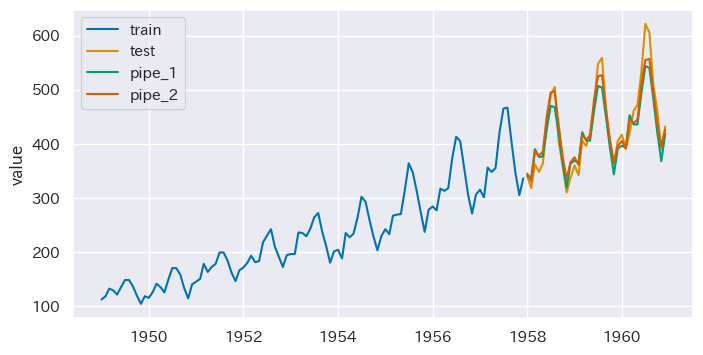

In [27]:
# ==========================================================
# ‰∫àÊ∏¨ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
# ==========================================================
# sktime „ÅÆ plot_series() „ÇíÂà©Áî®„Åó„Å¶„ÄÅ
# Ë®ìÁ∑¥„Éá„Éº„Çø„Éª„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Éª2Á®ÆÈ°û„ÅÆ„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÁµêÊûú„Çí
# 1„Å§„ÅÆÊäò„ÇåÁ∑ö„Ç∞„É©„Éï‰∏ä„Å´ÊèèÁîª„Åô„Çã„ÄÇ
# ----------------------------------------------------------

fig, ax = plot_series(
    train,
    test,  # Ë®ìÁ∑¥„Éá„Éº„Çø„Éª„ÉÜ„Çπ„Éà„Éá„Éº„Çø
    pipe_pred_1,
    pipe_pred_2,  # 2„Å§„ÅÆ„Éë„Ç§„Éó„É©„Ç§„É≥„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÂÄ§
    labels=["train", "test", "pipe_1", "pipe_2"],  # Âá°‰æã„ÅÆË®≠ÂÆö
    markers=np.tile("", 4),  # „Éû„Éº„Ç´„Éº„ÇíÈùûË°®Á§∫„Å´„Åô„ÇãÔºàÊäò„ÇåÁ∑ö„ÅÆ„ÅøÔºâ
)

# „Ç∞„É©„Éï„ÅÆ„Çµ„Ç§„Ç∫„ÇíÊåáÂÆö
fig.set_size_inches(8, 4)

# ----------------------------------------------------------
# üìò Ëß£Ë™¨Ôºö
# „Éª`pipe_1`ÔºöÂ≠£ÁØÄË™øÊï¥ + „Éà„É¨„É≥„ÉâÈô§Âéª + „Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ „ÅÆ„É¢„Éá„É´
# „Éª`pipe_2`ÔºöÂ∑ÆÂàÜÂåñ + Â≠£ÁØÄ„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨ „ÅÆ„É¢„Éá„É´
#
# „Åì„Çå„Å´„Çà„Çä„ÄÅ„Å©„Å°„Çâ„ÅÆÂâçÂá¶ÁêÜ„Éª„É¢„Éá„É´ÊßãÊàê„Åå
# „ÉÜ„Çπ„ÉàÊúüÈñì„Å´„Åä„ÅÑ„Å¶„Çà„ÇäÂÆü„Éá„Éº„Çø„Å´Ëøë„ÅÑÊåôÂãï„ÇíÁ§∫„Åô„Åã
# Áõ¥ÊÑüÁöÑ„Å´ÊØîËºÉ„Åß„Åç„Çã„ÄÇ
# ==========================================================

In [28]:
# ==========================================================
# „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢ÔºàGrid SearchÔºâ„Å´„Çà„ÇãÊåÅÁ∂ö‰∫àÊ∏¨„É¢„Éá„É´„ÅÆÊúÄÈÅ©Âåñ
# ==========================================================
# NaiveForecasterÔºà„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨Ôºâ„Çí„Éô„Éº„Çπ„Å´„ÄÅ
# Â≠£ÁØÄÂë®ÊúüÔºàspÔºâ„ÅÆÂÄ§„Çí 1„Äú12 „ÅÆÁØÑÂõ≤„Åß„Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅ„Åô„Çã„ÄÇ
#
# ÁõÆÁöÑÔºöÊúÄ„ÇÇ‰∫àÊ∏¨Ë™§Â∑ÆÔºàMAEÔºâ„ÅåÂ∞è„Åï„Åè„Å™„ÇãÂ≠£ÁØÄÂë®Êúü„ÇíÈÅ∏Êäû„Åô„Çã„ÄÇ
# ----------------------------------------------------------

# ÊåÅÁ∂ö‰∫àÊ∏¨„É¢„Éá„É´„ÅÆÂÆöÁæ©ÔºàÂâçÂõûÂÄ§„Çí„Åù„ÅÆ„Åæ„Åæ‰∫àÊ∏¨Ôºâ
naive_forecaster = NaiveForecaster(strategy="last", sp=1)

# „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÂÄôË£ú
# sp: "seasonal periodicity"ÔºàÂ≠£ÁØÄÂë®ÊúüÔºâ
#     ‰æã: sp=12 ‚Üí 12„É∂ÊúàÂë®Êúü„ÅÆÂ≠£ÁØÄÊÄß„Çí‰ªÆÂÆö
param_grid = {"sp": np.arange(1, 13)}

# „Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅ„Å´„Çà„ÇãÊúÄÈÅ©Âåñ
best_naive_forecaster = ForecastingGridSearchCV(
    forecaster=naive_forecaster,  # „É¢„Éá„É´Êú¨‰Ωì
    param_grid=param_grid,  # Ê§úÁ¥¢„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ
    cv=cv,  # ÊôÇÁ≥ªÂàóÂØæÂøú„ÅÆCVÔºàExpandingWindowSplitter„Å™„Å©Ôºâ
    scoring=MeanAbsoluteError(),  # Ë©ï‰æ°ÊåáÊ®ôÔºàÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ
    strategy="refit",  # ÂêÑfold„Åî„Å®„Å´ÂÜçÂ≠¶Áøí„ÇíÂÆüÊñΩ
)

# ----------------------------------------------------------
# üìò Ëß£Ë™¨Ôºö
# - `ForecastingGridSearchCV` „ÅØ sklearn „ÅÆ GridSearchCV „Å´‰ºº„Å¶„ÅÑ„Çã„Åå„ÄÅ
#   ÊôÇÁ≥ªÂàó„Éá„Éº„ÇøÂêë„ÅëÔºàsktimeÂ∞ÇÁî®Ôºâ„Å´Êã°Âºµ„Åï„Çå„ÅüÂÆüË£Ö„ÄÇ
# - „Åì„ÅÆË®≠ÂÆö„Å´„Çà„Çä„ÄÅÂêÑ `sp` ÂÄ§„Å´ÂØæ„Åó„Å¶„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅåË°å„Çè„Çå„ÄÅ
#   ÊúÄ„ÇÇ MAE „ÅåÂ∞è„Åï„ÅÑÂë®Êúü„ÇíËá™ÂãïÁöÑ„Å´ÈÅ∏Êäû„Åß„Åç„Çã„ÄÇ
# ==========================================================

In [29]:
# ==========================================================
# „Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅÁµêÊûú„ÅÆÁ¢∫Ë™ç
# ==========================================================

# Â≠¶Áøí„Éá„Éº„ÇøÔºàtrainÔºâ„Å´ÂØæ„Åó„Å¶ÊúÄÈÅ©„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÇíÂÆüË°å
best_naive_forecaster.fit(train)

# ÈÅ∏„Å∞„Çå„ÅüÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÇíË°®Á§∫
best_naive_forecaster.best_params_

# ----------------------------------------------------------
# üìò Ëß£Ë™¨Ôºö
# - `.fit(train)` „Å´„Çà„Çä„ÄÅÂêÑÂÄôË£ú„Éë„É©„É°„Éº„ÇøÔºàsp = 1„Äú12Ôºâ„Å´„Å§„ÅÑ„Å¶
#   „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÇíÂÆüÊñΩ„Åó„ÄÅMAE„ÅåÊúÄ„ÇÇÂ∞è„Åï„ÅÑ„Éë„É©„É°„Éº„Çø„ÇíÊé¢Á¥¢„ÄÇ
# - `.best_params_` „ÅØÊúÄÁµÇÁöÑ„Å´ÈÅ∏„Å∞„Çå„ÅüÊúÄÈÅ©„Å™Ë®≠ÂÆö„ÇíËøî„Åô„ÄÇ
#
#   ‰æãÔºö{'sp': 12}
#   ‚Üí 12„É∂ÊúàÂë®Êúü„ÅÆÂ≠£ÁØÄÊÄß„ÇíÊåÅ„Å§„ÄåÂ≠£ÁØÄ„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨„Äç„ÅåÊúÄÈÅ©„Å®Âà§Êñ≠„Åï„Çå„Åü„Åì„Å®„ÇíÊÑèÂë≥„Åô„Çã„ÄÇ
# ==========================================================

{'sp': 12}

In [30]:
# ==========================================================
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ÁµêÊûú„ÅÆË©≥Á¥∞„ÇíÁ¢∫Ë™ç
# ==========================================================

# best_naive_forecaster.cv_results_ „ÅØ„ÄÅ
# ÂêÑ„Éë„É©„É°„Éº„ÇøË®≠ÂÆö„Åî„Å®„ÅÆË©ï‰æ°ÁµêÊûú„Çí„Åæ„Å®„ÇÅ„ÅüËæûÊõ∏ÔºàdictÔºâÂΩ¢Âºè„ÅßÂá∫Âäõ„Åï„Çå„Çã„ÄÇ

print(best_naive_forecaster.cv_results_)

# ----------------------------------------------------------
# üìò Âê´„Åæ„Çå„Çã‰∏ª„Å™„Ç≠„Éº„ÅÆÊÑèÂë≥Ôºö
# ----------------------------------------------------------
# 'param_sp'         : Ë©¶„Åó„ÅüÂ≠£ÁØÄÂë®ÊúüÔºàspÔºâ„ÅÆÂÄ§
# 'mean_test_score'  : ÂêÑ„Éë„É©„É°„Éº„ÇøË®≠ÂÆö„Åß„ÅÆ MAEÔºàÂπ≥Âùá„Çπ„Ç≥„Ç¢Ôºâ
# 'rank_test_score'  : „Çπ„Ç≥„Ç¢„ÅÆÈ†Ü‰ΩçÔºà1 „ÅåÊúÄËâØÔºâ
# 'split0_test_score', 'split1_test_score', ... :
#                      ÂêÑÂàÜÂâ≤ÔºàfoldÔºâ„Åî„Å®„ÅÆ„Çπ„Ç≥„Ç¢
#
# „Åì„Çå„ÇíÁ¢∫Ë™ç„Åô„Çã„Åì„Å®„Åß„ÄÅ
# „Å©„ÅÆÂ≠£ÁØÄÂë®ÊúüÔºàspÔºâ„ÅåÊúÄ„ÇÇ‰∫àÊ∏¨Á≤æÂ∫¶„ÇíÈ´ò„ÇÅ„Åü„Åã„ÇíÂèØË¶ñÁöÑ„Å´Ê§úË®º„Åß„Åç„Çã„ÄÇ
# ==========================================================

    mean_test_MeanAbsoluteError  mean_fit_time  mean_pred_time      params  \
0                     43.511905       0.001996        0.005378   {'sp': 1}   
1                     56.630952       0.001790        0.013546   {'sp': 2}   
2                     52.178571       0.002096        0.012989   {'sp': 3}   
3                     47.000000       0.002186        0.015964   {'sp': 4}   
4                     49.702381       0.002592        0.017638   {'sp': 5}   
5                     41.273810       0.001980        0.015602   {'sp': 6}   
6                     43.500000       0.001911        0.015403   {'sp': 7}   
7                     48.119048       0.001961        0.014324   {'sp': 8}   
8                     41.285714       0.001730        0.012856   {'sp': 9}   
9                     37.761905       0.002098        0.011524  {'sp': 10}   
10                    35.571429       0.001774        0.013495  {'sp': 11}   
11                    33.083333       0.001762        0.011044  

In [31]:
# ==========================================================
# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„Åß„ÅÆ‰∫àÊ∏¨„Å®Á≤æÂ∫¶Ë©ï‰æ°
# ==========================================================

# -------------------------------
# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÇíÁî®„ÅÑ„Å¶‰∫àÊ∏¨„ÇíÂÆüÊñΩ
# -------------------------------
best_naive_pred = best_naive_forecaster.predict(fh)

# -------------------------------
# ‰∫àÊ∏¨Á≤æÂ∫¶ÔºàMAEÔºöÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ„ÇíÁÆóÂá∫
# -------------------------------
mae_best = mean_absolute_error(test, best_naive_pred)
print("ÊúÄÈÅ©„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨„ÅÆMAEÔºö", mae_best)

# ----------------------------------------------------------
# üìò Ëß£Ë™¨Ôºö
# - „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßÈÅ∏„Å∞„Çå„ÅüÊúÄÈÅ©„Å™ seasonal period (sp) „ÇíÁî®„ÅÑ„ÄÅ
#   „ÉÜ„Çπ„Éà„Éá„Éº„ÇøÁØÑÂõ≤„ÅÆ‰∫àÊ∏¨„ÇíÂÆüÊñΩ„ÄÇ
# - `mean_absolute_error` „Å´„Çà„Çä„ÄÅÂÆüÈöõ„ÅÆË¶≥Ê∏¨ÂÄ§„Å®„ÅÆ„Ç∫„É¨„ÇíË©ï‰æ°„ÄÇ
# - MAE „ÅåÂ∞è„Åï„ÅÑ„Åª„Å©‰∫àÊ∏¨Á≤æÂ∫¶„ÅåÈ´ò„ÅÑ„É¢„Éá„É´„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ§∫„Åô„ÄÇ
# ==========================================================

ÊúÄÈÅ©„Éä„Ç§„Éº„Éñ‰∫àÊ∏¨„ÅÆMAEÔºö 60.083333333333336
